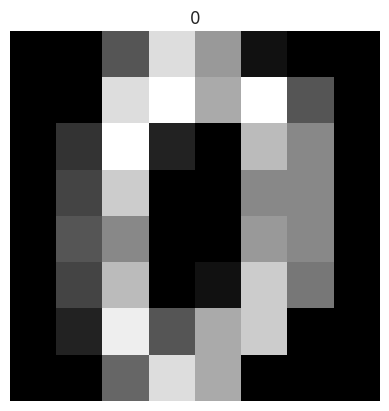

In [27]:
from random import sample
from unicodedata import digit

import numpy as np
# exercise 1
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

# print(digits.feature_names)

image = digits.images[0]
label = digits.target[0]


plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.title(label)
plt.axis('off')
plt.show()



In [28]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.90      0.95        30
           9       0.93      0.95      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



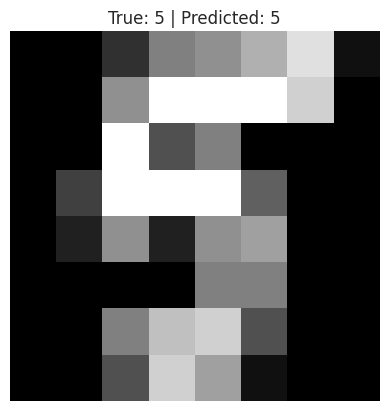

In [31]:
import matplotlib.pyplot as plt

index = 50 # Change this to test a different digit
sample_image = X_test[index].reshape(1, -1)
true_label = y_test[index]

# Predict using the model
predicted_label = knn.predict(sample_image)

# Show the image with prediction
plt.imshow(X_test[index].reshape(8 ,8), cmap='gray')
plt.title(f"True: {true_label} | Predicted: {predicted_label[0]}")
plt.axis('off')
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


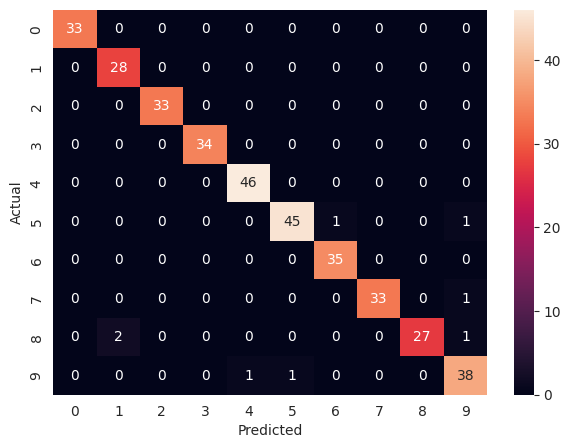

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()